posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(0.80, 0.67)
(0.90, 0.65)
(1.00, 0.68)
(0.90, 0.66)
(0.90, 0.66)
(0.60, 0.55)
(0.80, 0.55)
(0.50, 0.53)
(0.90, 0.53)
(0.90, 0.55)
(0.50, 0.33)
(0.80, 0.36)
(0.60, 0.36)
(0.70, 0.36)
(0.80, 0.36)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.02)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(0.80, 0.55)
(0.80, 0.55)
(0.80, 0.55)
(0.80, 0.55)
(0.80, 0.55)
(0.70, 0.21)
(0.70, 0.21)
(0.70, 0.21)
(0.70, 0.21)
(0.70, 0.21)
(0.10, 0.09)
(0.10, 0.09)
(0.10, 0.09)
(0.10, 0.09)
(0.10, 0.09)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.03)
(0.00, 0.03)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(0.80, 0.64)
(0.80, 0.64)
(0.80, 0.64)
(0.80, 0.64)
(0.80, 0.64)
(0.70, 0.38)
(0.70, 0.38)
(0.70, 0.38)
(0.70, 0.38)
(0.70, 0.38)
(0.10, 0.17)
(0.10, 0.17)
(0.10, 0.17)
(0.10, 0.17)
(0.10, 0.17)
(0.00, 0.08)
(0.00, 0.08)
(0.00, 0.08)
(0.00, 0.08)
(0.00, 0.08)
(1.00, inf)
(1.00, inf)
(1.00, inf)
(1.0

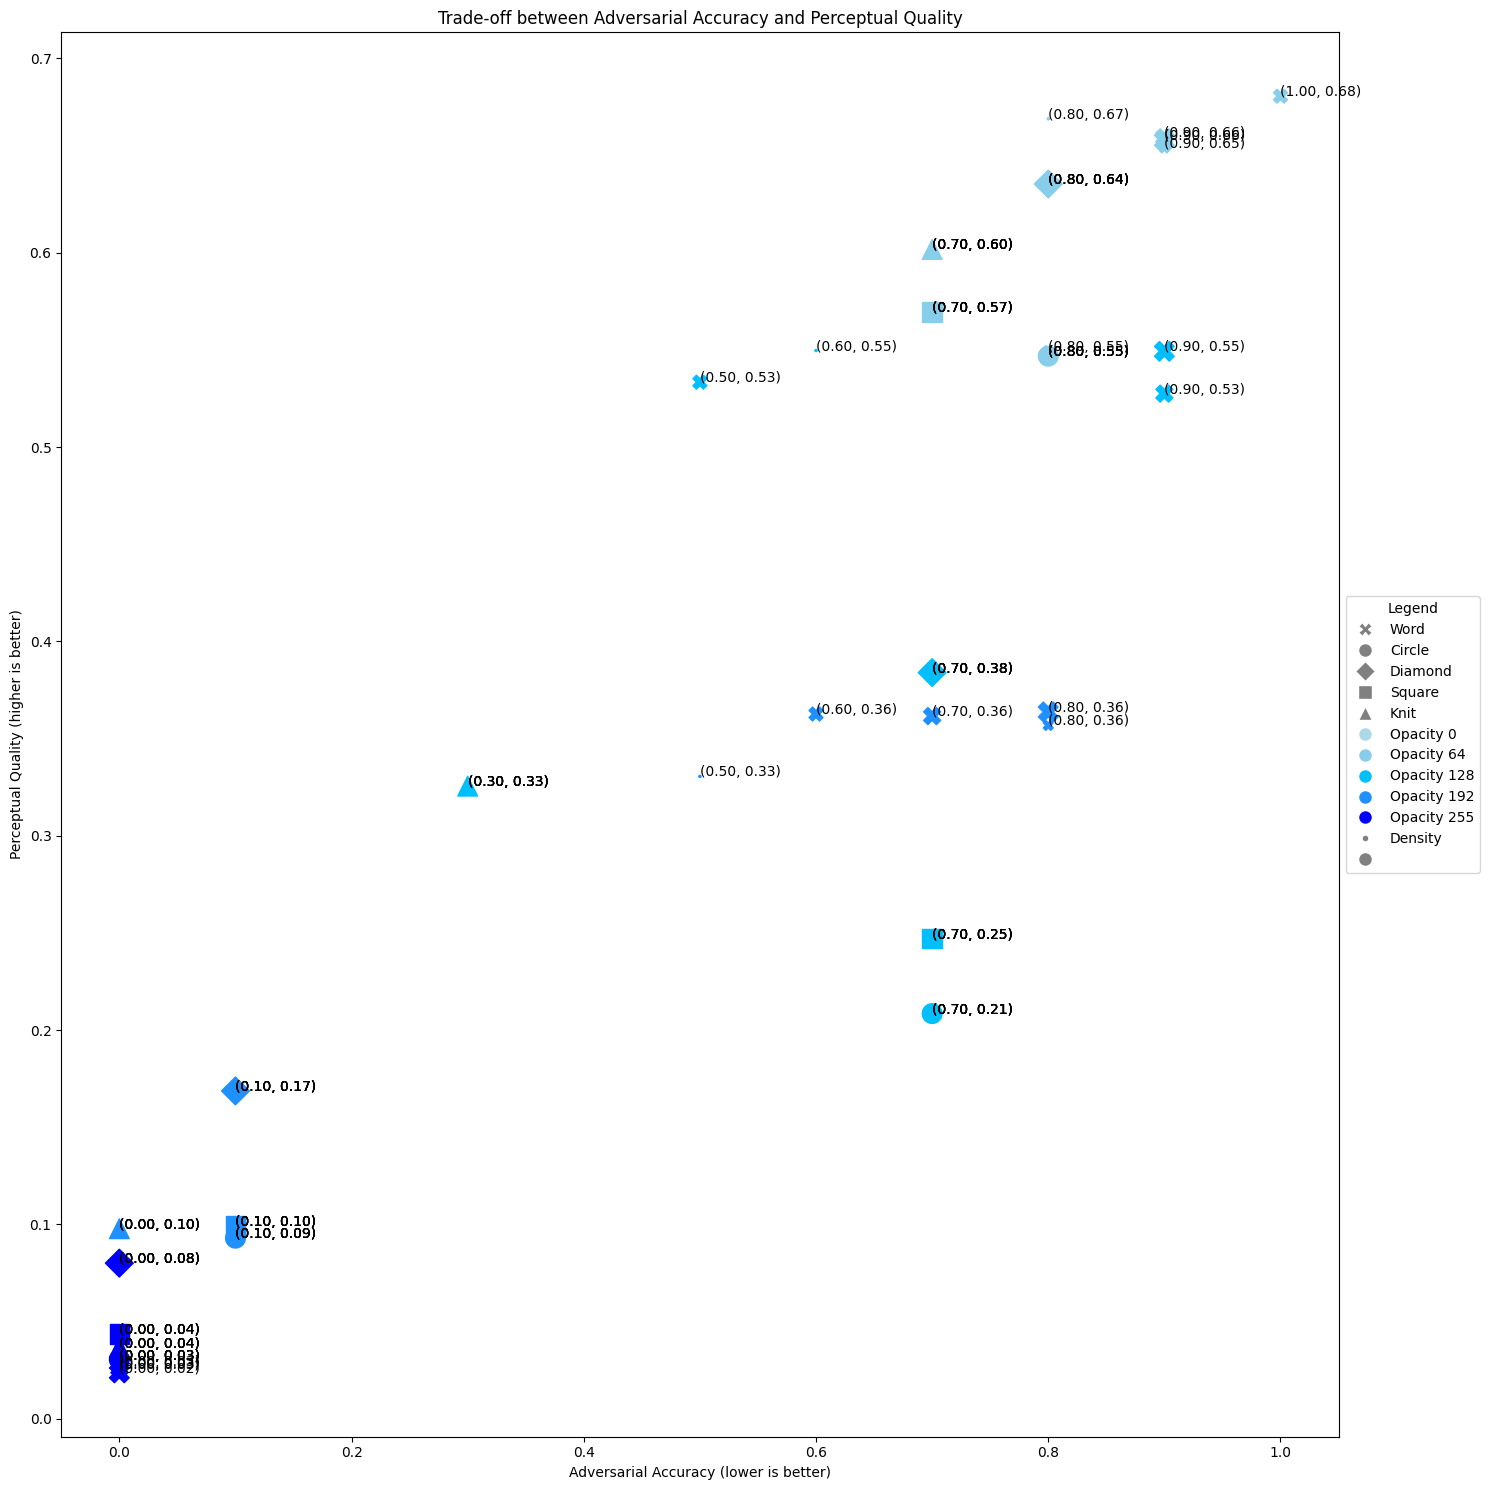

Top 10 results (lowest adversarial accuracy and highest quality):
       mask  opacity  density   quality
1      knit      192        1  0.097717
2      knit      192      100  0.097717
3      knit      192       75  0.097717
4      knit      192       50  0.097717
5      knit      192       25  0.097717
6   diamond      255       50  0.080028
7   diamond      255      100  0.080028
8   diamond      255       75  0.080028
9   diamond      255       25  0.080028
10  diamond      255        1  0.080028


In [51]:
import numpy as np
from pathlib import Path
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


datapath = Path.cwd().parent / "data" / "eval" / "0-eval_cls_mask.csv"
data = pd.read_csv(datapath)


# add 2 inferred metrics
data['adv_acc'] = (data['advx_acc1'] + data['advx_acc5']) / 2
data['quality'] = (data['cosine_sim'] + data['psnr'] / 100 + data['ssim']) / 3

# group by mask, opacity, and density - get mean of just the 2 inferred metrics
data = data.groupby(['mask', 'opacity', 'density']).agg({
    'adv_acc': 'mean',
    'quality': 'mean',
}).reset_index()

# markers and colors
markers = {'word': 'X', 'circle': 'o', 'diamond': 'D', 'square': 's', 'knit': '^'}
colors = {0: 'lightblue', 64: 'skyblue', 128: 'deepskyblue', 192: 'dodgerblue', 255: 'blue'}

plt.figure(figsize=(15, 15))

coordinates = []

for mask in markers:
    for opacity in colors:
        mask_opacity_data = data[(data['mask'] == mask) & (data['opacity'] == opacity)]
        for _, row in mask_opacity_data.iterrows():
            coordinates.append((row['adv_acc'], row['quality']))
        plt.scatter(mask_opacity_data['adv_acc'], mask_opacity_data['quality'], 
                    marker=markers[mask], c=colors[opacity], s=mask_opacity_data['density']*2,
                    label=f'{mask}, opacity={opacity}')

for x, y in coordinates:
    print(f'({x:.2f}, {y:.2f})')
    plt.text(x, y, f'({x:.2f}, {y:.2f})')


plt.xlabel('Adversarial Accuracy (lower is better)')
plt.ylabel('Perceptual Quality (higher is better)')
plt.title('Trade-off between Adversarial Accuracy and Perceptual Quality')

# legend for markers
legend_elements = [plt.Line2D([0], [0], marker='X', color='w', label='Word', markerfacecolor='gray', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='gray', markersize=10),
                   plt.Line2D([0], [0], marker='D', color='w', label='Diamond', markerfacecolor='gray', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='w', label='Square', markerfacecolor='gray', markersize=10),
                   plt.Line2D([0], [0], marker='^', color='w', label='Knit', markerfacecolor='gray', markersize=10)]

# legend for opacity
for opacity, color in colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Opacity {opacity}', markerfacecolor=color, markersize=10))

# legend for density
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Density', markerfacecolor='gray', markersize=5))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='', markerfacecolor='gray', markersize=10))

plt.legend(handles=legend_elements, title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# -----

# from those with adv_acc == 0, get top 10 with highest quality
top_low_adv = data[data['adv_acc'] == 0].sort_values(by='quality', ascending=False).head(10)
top_low_adv = top_low_adv.reset_index(drop=True)
top_low_adv.index += 1

print("Top 10 results (lowest adversarial accuracy and highest quality):")
print(top_low_adv[['mask', 'opacity', 'density', 'quality']])